# Predict medical expenses using linear regression

Data Info -
#age: An integer indicating the age of the primary beneficiary
#sex: The policy holder's gender, either male or female.
#bmi: The body mass index (BMI), which provides a sense of how over- or under-weight a person is relative to their height
#children: An integer indicating the number of children/dependents covered by the insurance plan.
#smoker: A yes or no categorical variable that indicates whether the insured regularly smokes tobacco.
#region: The beneficiary's place of residence in the US


In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
%matplotlib inline

# Numerical libraries
import numpy as np   

# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression

# to handle data in form of rows and columns 
import pandas as pd    

# importing ploting libraries
import matplotlib.pyplot as plt   
import matplotlib.style
plt.style.use('classic')

#importing seaborn for statistical plots
import seaborn as sns

# Question 1- Get the data.



The data is given in Olympus with the name insurance.csv. You need to load the data with the help of pandas.

In [3]:

in_df = pd.read_csv("insurance.csv")
in_df.head()
in_df.shape
in_df.dtypes
in_df.isnull().values.any()
in_df.isnull().sum().sum()
in_df.isna().values.any()
in_df.isna().sum().sum()
in_df.describe()
in_df.describe().transpose()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


(1338, 7)

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

False

0

False

0

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


# Question 2 - Check the distribution of expenses(charges) and state your insights.

C:\Users\rajan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


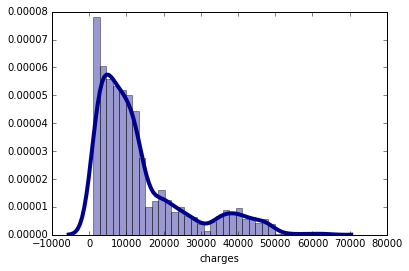

In [4]:
sns.distplot(in_df['charges'], hist=True, kde=True, bins=int(90000/2500),
            color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

(array([70., 81., 57., 51., 64., 59., 47., 54., 53., 41., 54., 45., 47.,
        40., 52., 47., 37., 35., 27., 21.,  7., 10., 12., 10., 12., 17.,
        13., 11., 13., 12.,  9.,  7.,  7., 11.,  8.,  8.,  3.,  9.,  4.,
         7.,  4.,  5.,  1.,  1.,  1.,  3.,  5.,  7.,  9.,  3., 10.,  8.,
         6.,  8.,  6., 11.,  5.,  6.,  8.,  5.,  4.,  7.,  5.,  1.,  8.,
         5.,  6.,  3.,  7.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,
         0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,  1.]),
 array([ 1121.8739    ,  1817.96894567,  2514.06399133,  3210.159037  ,
         3906.25408267,  4602.34912833,  5298.444174  ,  5994.53921967,
         6690.63426533,  7386.729311  ,  8082.82435667,  8778.91940233,
         9475.014448  , 10171.10949367, 10867.20453933, 11563.299585  ,
        12259.39463067, 12955.48967633, 13651.584722  , 14347.67976767,
        15043.77481333, 15739.869859  , 16435.96490467, 17132.05995033,
        17828.154996  , 18524.25004167, 19220.34508733, 1991

(array([182., 141., 130., 124., 121., 117., 103.,  64.,  23.,  28.,  37.,
         29.,  19.,  23.,  16.,  15.,   9.,   3.,  11.,  16.,  21.,  17.,
         22.,  13.,  15.,  10.,  13.,   9.,   1.,   1.,   0.,   1.,   0.,
          2.,   0.,   2.]),
 array([ 1121.8739    ,  2862.11151417,  4602.34912833,  6342.5867425 ,
         8082.82435667,  9823.06197083, 11563.299585  , 13303.53719917,
        15043.77481333, 16784.0124275 , 18524.25004167, 20264.48765583,
        22004.72527   , 23744.96288417, 25485.20049833, 27225.4381125 ,
        28965.67572667, 30705.91334083, 32446.150955  , 34186.38856917,
        35926.62618333, 37666.8637975 , 39407.10141167, 41147.33902583,
        42887.57664   , 44627.81425417, 46368.05186833, 48108.2894825 ,
        49848.52709667, 51588.76471083, 53329.002325  , 55069.23993917,
        56809.47755333, 58549.7151675 , 60289.95278167, 62030.19039583,
        63770.42801   ]),
 <a list of 36 Patch objects>)

(array([323., 254., 238., 167.,  51.,  66.,  42.,  31.,  12.,  27.,  38.,
         35.,  25.,  22.,   2.,   1.,   2.,   2.]),
 array([ 1121.8739    ,  4602.34912833,  8082.82435667, 11563.299585  ,
        15043.77481333, 18524.25004167, 22004.72527   , 25485.20049833,
        28965.67572667, 32446.150955  , 35926.62618333, 39407.10141167,
        42887.57664   , 46368.05186833, 49848.52709667, 53329.002325  ,
        56809.47755333, 60289.95278167, 63770.42801   ]),
 <a list of 18 Patch objects>)

(array([453., 362., 190.,  94.,  58.,  27.,  48.,  52.,  38.,  11.,   1.,
          4.]),
 array([ 1121.8739   ,  6342.5867425, 11563.299585 , 16784.0124275,
        22004.72527  , 27225.4381125, 32446.150955 , 37666.8637975,
        42887.57664  , 48108.2894825, 53329.002325 , 58549.7151675,
        63770.42801  ]),
 <a list of 12 Patch objects>)

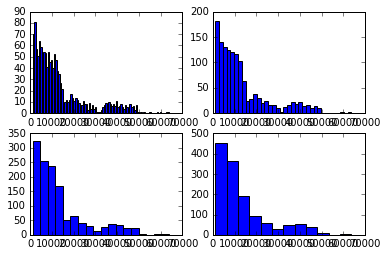

In [5]:
for i, binwidth in enumerate([1000, 2500, 5000, 7500]):
    
    # Set up the plot
    ax = plt.subplot(2, 2, i + 1)
    
    # Draw the plot
    ax.hist(in_df['charges'], bins = int(90000/binwidth),
             color = 'blue', edgecolor = 'black')

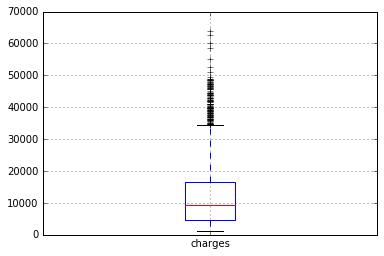

In [6]:
boxplot = in_df.boxplot(column=['charges'])

In [ ]:
# The distribution of charges is right skewed and there are lots of outs liers in the right tail

# Question 3 - Explore the relationship between variables. 

You can use corr() function or any other function to do the same.

In [7]:
# Correlation martix
in_df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


# Question 4 - Use charges as dependent feature and Get the train and test data from your dataset.

In [8]:
# Create a separate dataframe consisting only of the features i.e independent attributes

#in_feature_df = in_df.drop(labels= "charges" , axis = 1)
#in_feature_df.head()
X = in_df.drop("charges", axis=1)
Y = in_df[['charges']]
X.shape
Y.shape

(1338, 6)

(1338, 1)

In [21]:
# splitting data into training and test set for independent attributes
from sklearn.model_selection import train_test_split

# Split X and y into training and test set in 70:30 ratio

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=1)
print("X_train ", X_train.shape)
print("X_test ", X_test.shape)
print("Y_train ", Y_train.shape)
print("Y_test ", Y_test.shape)

X_train  (936, 6)
X_test  (402, 6)
Y_train  (936, 1)
Y_test  (402, 1)


# Question 5 - Create the dummies for the categorical variables/features for both train and test independent data.

You can use pd.get_dummies() function to do so.

In [23]:
X_train=pd.get_dummies(X_train ,columns=['sex','smoker','region'])
X_train.shape

(936, 11)

In [24]:
X_test=pd.get_dummies(X_test,columns=['sex','smoker','region'])
X_test.shape

(402, 11)

# Question 6 - Train your model.

In [25]:
# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression
regression_model = LinearRegression()
regression_model.fit(X_train, Y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

# Question 7 - Fit your model and get the summary of model. Print the coefficients.

In [29]:
# Let us explore the coefficients for each of the independent attributes
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for age is 251.68186514630298
The coefficient for bmi is 322.3891068370296
The coefficient for children is 344.9642552960416
The coefficient for sex_female is 141.39817330439362
The coefficient for sex_male is -141.39817330439547
The coefficient for smoker_no is -12029.695238461698
The coefficient for smoker_yes is 12029.695238461698
The coefficient for region_northeast is 527.9051883044182
The coefficient for region_northwest is 223.81509065014077
The coefficient for region_southeast is -411.4369086013035
The coefficient for region_southwest is -340.2833703532544


# Question 8 - Predict the charges for test data and evaluate the model performance. 

You can get the values of MAE, MSE, RMSE to show the evaluation parameters of your model

In [31]:
y_pred = regression_model.predict(X_test)


In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import math
# The mean absolute error
mae = mean_absolute_error(Y_test, y_pred)
print("Mean absolute error: %.4f" % mae)
# The mean squared error
mse = mean_squared_error(Y_test, y_pred)
print("Mean squared error: %.4f" % mse)
print("Root mean square error: %.4f" % math.sqrt(mse))
# Explained variance score: 1 is perfect prediction
print('R Square score: %.2f' % r2_score(Y_test, y_pred))


Mean absolute error: 4139.9321
Mean squared error: 36761456.3520
Root mean square error: 6063.1227
R Square score: 0.74


In [33]:
regression_model.score(X_train, Y_train)
regression_model.score(X_test, Y_test)

0.7545557492633161

0.740598931692721

# Naive Bayes with IRIS Data

# Question 9 - Import Iris dataset from Sklear lib and slice the data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

#### **Attributes of the dataset:** https://archive.ics.uci.edu/ml/datasets/Iris

In [37]:
# read the data
from sklearn import datasets
iris_df = pd.read_csv("Iris.csv")
iris_df.head()
iris_df.shape

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


(150, 6)

In [38]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

# save load_iris() sklearn dataset to iris
# if you'd like to check dataset type use: type(load_iris())
# if you'd like to view list of attributes use: dir(load_iris())
iris = load_iris()
iris
# np.c_ is the numpy concatenate function
# which is used to concat iris['data'] and iris['target'] arrays 
# for pandas column argument: concat iris['feature_names'] list
# and string list (in this case one string); you can make this anything you'd like..  
# the original dataset would probably call this ['Species']
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['Species'])


{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [39]:
iris_df.shape
iris_df.head()

(150, 5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [40]:
X = iris_df.drop("Species", axis=1)
Y = iris_df[['Species']]
X.shape
Y.shape

(150, 4)

(150, 1)

## Question 10 - Plot Scatter Matrix to understand the distribution of variables and give insights from it( 1 Marks)

C:\Users\rajan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\rajan\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\rajan\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\rajan\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


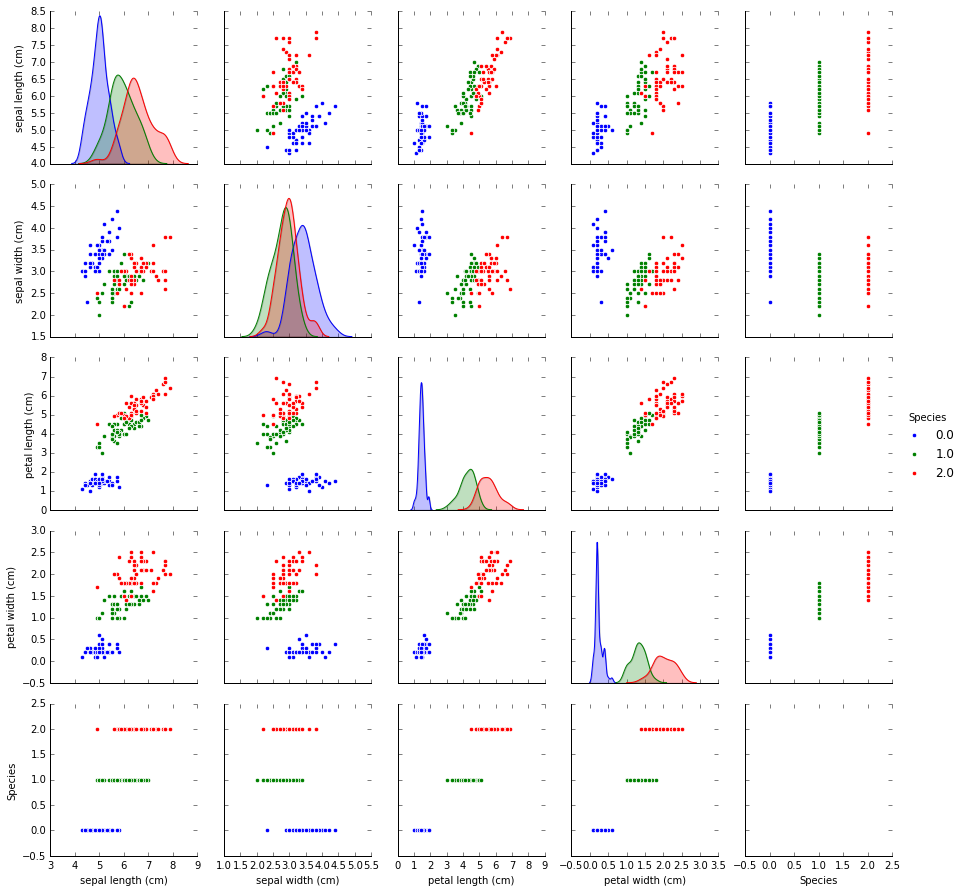

In [41]:
sns.pairplot(iris_df, hue="Species")

## Question 11- Do Feature Scaling 

In [42]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() 
  
# To scale data 
scaler.fit(iris_df)

StandardScaler(copy=True, with_mean=True, with_std=True)

## Question 12- Train and Fit NaiveBayes Model

In [43]:
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
train_set, test_set, train_labels, test_labels = train_test_split(X, Y, test_size=0.30, random_state=1)

# Invoking the NB Gaussian function to create the model
# fitting the model in the training data set
model_gnb = GaussianNB()
model_gnb.fit(train_set, train_labels)

model_gnb.score(train_set , train_labels)      # performance on test data

test_pred = model_gnb.predict(test_set)

print(metrics.classification_report(test_labels, test_pred))


C:\Users\rajan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

0.9523809523809523

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        14
         1.0       0.94      0.89      0.91        18
         2.0       0.86      0.92      0.89        13

   micro avg       0.93      0.93      0.93        45
   macro avg       0.93      0.94      0.93        45
weighted avg       0.94      0.93      0.93        45



## Question 13 - Print Accuracy and Confusion Matrix and Conclude your findings

In [44]:
from sklearn.model_selection import cross_val_score, cross_val_predict

y_predict_gnb = model_gnb.predict(test_set)
gnb_acc=metrics.accuracy_score(test_labels,y_predict_gnb)
print("Naive Bayes Accuracy is: ", gnb_acc)
print(metrics.confusion_matrix(test_labels, test_pred))
scores = cross_val_score(model_gnb, train_set, train_labels, cv=10)
print("Cross-validated scores:", scores , scores)
print("Average score:" , np.average(scores))

Naive Bayes Accuracy is:  0.9333333333333333
[[14  0  0]
 [ 0 16  2]
 [ 0  1 12]]
Cross-validated scores: [1.         1.         0.90909091 1.         0.90909091 0.90909091
 1.         0.88888889 0.88888889 0.88888889] [1.         1.         0.90909091 1.         0.90909091 0.90909091
 1.         0.88888889 0.88888889 0.88888889]
Average score: 0.9393939393939394


C:\Users\rajan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rajan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rajan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rajan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

# Ensemble Methods

## Question 14-  Apply the Random forest model and print the accuracy of Random forest Model


In [45]:
from sklearn.ensemble import RandomForestClassifier
Rf_model = RandomForestClassifier(n_estimators=50,criterion='entropy',max_depth=3,random_state=0 )
Rf_model.fit(train_set, train_labels)

y_predict_Rf=Rf_model.predict(test_set)
Rf_acc=metrics.accuracy_score(test_labels,y_predict_Rf)
print("Random Forest Model Accuracy: ", Rf_acc)



C:\Users\rajan\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

Random Forest Model Accuracy:  0.9555555555555556


## Question 15 - Apply GradientBoost Classifier Algorithm for the same data and print the accuracy

In [46]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 51)
gbcl.fit(train_set, train_labels)

y_pred_gbcl = gbcl.predict(test_set)

gbcl_acc=metrics.accuracy_score(test_labels, y_pred_gbcl)
print("GradientBoost Classifier Accuracy: ", gbcl_acc)

C:\Users\rajan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=51,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

GradientBoost Classifier Accuracy:  0.9555555555555556
